# Shared sequences among individuals

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
cd /Users/kgrigait/Desktop/new_data

/Users/kgrigait/Desktop/new_data


In [4]:
#Load data
TRp_prod_1=pd.read_csv('S1/TRpairs_productive.txt', sep='\t')
TRp_prod_2=pd.read_csv('S2/TRpairs_productive.txt', sep='\t')
TRp_prod_3=pd.read_csv('S3/TRpairs_productive.txt', sep='\t')
TRp_prod_4=pd.read_csv('S4/TRpairs_productive.txt', sep='\t')
TRp_prod_5=pd.read_csv('S5/TRpairs_productive.txt', sep='\t')

TRA_prod_1=pd.read_csv('S1/TRAs_Final_productive.txt', sep='\t')
TRA_prod_2=pd.read_csv('S2/TRAs_Final_productive.txt', sep='\t')
TRA_prod_3=pd.read_csv('S3/TRAs_Final_productive.txt', sep='\t')
TRA_prod_4=pd.read_csv('S4/TRAs_Final_productive.txt', sep='\t')
TRA_prod_5=pd.read_csv('S5/TRAsFinal_productive.txt', sep='\t')

TRB_prod_1=pd.read_csv('S1/TRBs_Final_productive.txt', sep='\t')
TRB_prod_2=pd.read_csv('S2/TRBs_Final_productive.txt', sep='\t')
TRB_prod_3=pd.read_csv('S3/TRBs_Final_productive.txt', sep='\t')
TRB_prod_4=pd.read_csv('S4/TRBs_Final_productive.txt', sep='\t')
TRB_prod_5=pd.read_csv('S5/TRBsFinal_productive.txt', sep='\t')

In [5]:
#Shared paired alpha beta CDR3 sequences.
#Connect alpha and beta CDR3 sequences into one.
TRp_prod_1['CDR3_AB'] = TRp_prod_1['NSeqCDR3A']+'_'+TRp_prod_1['NSeqCDR3B']
TRp_prod_2['CDR3_AB'] = TRp_prod_2['NSeqCDR3A']+'_'+TRp_prod_2['NSeqCDR3B']
TRp_prod_3['CDR3_AB'] = TRp_prod_3['NSeqCDR3A']+'_'+TRp_prod_3['NSeqCDR3B']
TRp_prod_4['CDR3_AB'] = TRp_prod_4['NSeqCDR3A']+'_'+TRp_prod_4['NSeqCDR3B']
TRp_prod_5['CDR3_AB'] = TRp_prod_5['NSeqCDR3A']+'_'+TRp_prod_5['NSeqCDR3B']

#Get unique CDR3 sequences
CDR3_1=pd.DataFrame(TRp_prod_1.CDR3_AB.unique())
CDR3_2=pd.DataFrame(TRp_prod_2.CDR3_AB.unique())
CDR3_3=pd.DataFrame(TRp_prod_3.CDR3_AB.unique())
CDR3_4=pd.DataFrame(TRp_prod_4.CDR3_AB.unique())
CDR3_5=pd.DataFrame(TRp_prod_5.CDR3_AB.unique())

#Concatenate all 5 subjects into one dataframe.
CDR3_p=pd.concat([CDR3_1,CDR3_2,CDR3_3,CDR3_4,CDR3_5],axis=0)
CDR3_p.columns=['CDR3'] #rename the column into a string

shared_paired=([]) #initialize an array of paired sequence numbers.
for i in range(2,6):
    #find number of sequences paired among 2,3,4 and 5 subjects and fill the array
    shared_paired=np.append(shared_paired,sum(CDR3_p.CDR3.value_counts()==i))

In [6]:
#Shared alpha CDR3 sequences.
CDR3a_1=pd.DataFrame(TRA_prod_1.nSeqCDR3.unique())
CDR3a_2=pd.DataFrame(TRA_prod_2.nSeqCDR3.unique())
CDR3a_3=pd.DataFrame(TRA_prod_3.nSeqCDR3.unique())
CDR3a_4=pd.DataFrame(TRA_prod_4.nSeqCDR3.unique())
CDR3a_5=pd.DataFrame(TRA_prod_5.nSeqCDR3.unique())

#Concatenate all 5 subjects into one dataframe.
CDR3_a=pd.concat([CDR3a_1,CDR3a_2,CDR3a_3,CDR3a_4,CDR3a_5],axis=0)
CDR3_a.columns=['CDR3'] #rename the column into a string

alpha_shared=([]) #initialize an array of paired sequence numbers.
for i in range(2,6):
    #find number of sequences paired among 2,3,4 and 5 subjects and fill the array
    alpha_shared=np.append(alpha_shared,sum(CDR3_a.CDR3.value_counts()==i))

In [7]:
#Shared beta CDR3 sequences.
#Get unique CDR3 sequences
CDR3b_1=pd.DataFrame(TRB_prod_1.nSeqCDR3.unique())
CDR3b_2=pd.DataFrame(TRB_prod_2.nSeqCDR3.unique())
CDR3b_3=pd.DataFrame(TRB_prod_3.nSeqCDR3.unique())
CDR3b_4=pd.DataFrame(TRB_prod_4.nSeqCDR3.unique())
CDR3b_5=pd.DataFrame(TRB_prod_5.nSeqCDR3.unique())

#Concatenate all 5 subjects into one dataframe.
CDR3_b=pd.concat([CDR3b_1,CDR3b_2,CDR3b_3,CDR3b_4,CDR3b_5],axis=0)
CDR3_b.columns=['CDR3'] #rename the column into a string

beta_shared=([]) #initialize an array of paired sequence numbers.
for i in range(2,6):
    #find number of sequences paired among 2,3,4 and 5 subjects and fill the array
    beta_shared=np.append(beta_shared,sum(CDR3_b.CDR3.value_counts()==i))

#### Figure 5A

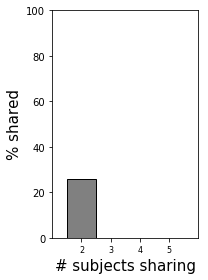

In [8]:
#Paired
f, ax1 = plt.subplots(1, figsize=(3,4))
bar_width = 1
bar_l = [i+1 for i in range(4)] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/2-0.5) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)
ax1.bar(bar_l, shared_paired.astype(int), width=bar_width, color='gray', edgecolor='black')
ax1.xaxis.set_ticks_position('bottom')
plt.xticks(np.array(tick_pos), ['2','3','4','5'], size=8) # set the x ticks with names
ax1.set_ylabel("% shared",fontsize=15)
ax1.set_xlabel("# subjects sharing",fontsize=15)
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(0,100)
plt.tight_layout()
plt.savefig('shared_cdr3_pairs.png')

#### Figure 5B

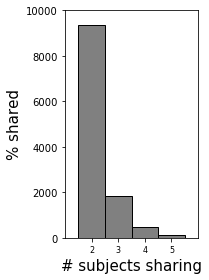

In [9]:
#alpha
f, ax1 = plt.subplots(1, figsize=(3,4))
bar_width = 1
bar_l = [i+1 for i in range(4)] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/2-0.5) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)
ax1.bar(bar_l, alpha_shared.astype(int), width=bar_width, color='gray', edgecolor='black')
ax1.xaxis.set_ticks_position('bottom')
plt.xticks(np.array(tick_pos), ['2','3','4','5'], size=8) # set the x ticks with names
ax1.set_ylabel("% shared",fontsize=15)
ax1.set_xlabel("# subjects sharing",fontsize=15)
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(0,10000)
plt.tight_layout()
plt.savefig('shared_cdr3_alpha.png')

#### Figure 5C

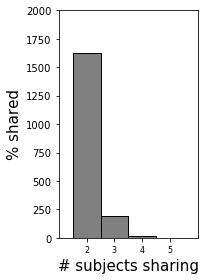

In [10]:
#beta
f, ax1 = plt.subplots(1, figsize=(3,4))
bar_width = 1
bar_l = [i+1 for i in range(4)] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/2-0.5) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)
ax1.bar(bar_l, beta_shared.astype(int), width=bar_width, color='gray', edgecolor='black')
ax1.xaxis.set_ticks_position('bottom')
plt.xticks(np.array(tick_pos), ['2','3','4','5'], size=8) # set the x ticks with names
ax1.set_ylabel("% shared",fontsize=15)
ax1.set_xlabel("# subjects sharing",fontsize=15)
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(0,2000)
plt.tight_layout()
plt.savefig('shared_cdr3_beta.png')
